Data Description: 

The data at hand contains medical costs of people characterized by certain attributes.

Domain: 

Healthcare

Context:

Leveraging customer information is paramount formost businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

Attribute Information:

* age: age of primary beneficiary
* sex: insurance contractor gender, female, male
* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,     objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* children: Number of children covered by health insurance / Number of dependents
* smoker: Smoking
* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* charges: Individual medical costs billed by health insurance.

Learning Outcomes: 

* Exploratory Data Analysis

* Practicing statistics using Python

* Hypothesis testing

Objective:

We want to see if we can dive deep into this data to find some valuable insights.

Steps and tasks:

1.Import the necessary libraries(2 marks)

2.Read the data as a data frame(2 marks)

3.Perform basic EDA which should include the following and print out your insights at every step.(28marks)

    a.Shape of the data (2marks)

    b.Data type of each attribute(2marks)

    c.Checking the presence of missing values(3marks)

    d.5 point summary of numerical attributes(3marks)

    e.Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.(4marks)

    f.Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns(2marks)

    g.Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns(4marks)

    h.Distribution of categorical columns (include children)(4marks)

    i.Pair plot that includes all the columns of the data frame (4marks)

4.Answer the following questions with statistical evidence(28marks)

    a.Do charges of people who smoke differ significantly from the people who don't?(7marks)

    b.Does bmi of males differ significantly from that of females?(7marks)

    c.Is the proportion of smokers significantly different in different genders?(7marks)

    d.Is the distribution of bmi across women with no children, one child and two children, the same?(7marks)

References:

* Applications of Data science in insurance domain
* Data science in Insurance


In [1]:
# IMPORT NECESSSARY LIBRARIES

import numpy as np
import pandas as pd
import math
import statistics
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape

(1338, 7)

In [5]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


OBSERVATIONS

* There are 1338 datapoints and 7 features(label included)
* There are no null values
* There are 2 integer based features, 2 float based features and 3 categorical based features
* The range of the numerical features differ and so we have to do normalizing during feature engineering.

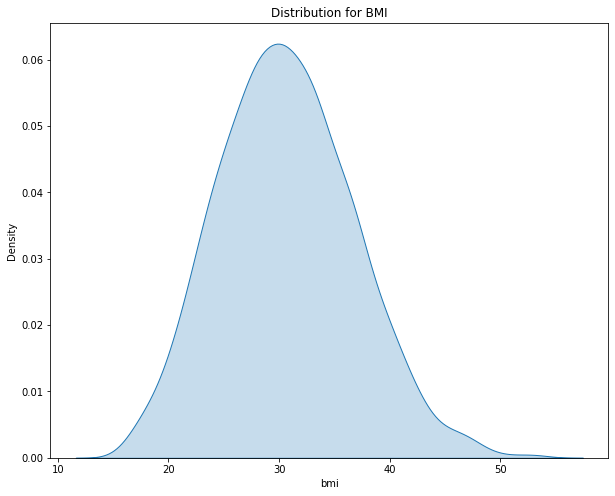

In [15]:
plt.figure(figsize=(10,8))
sns.kdeplot(data['bmi'], shade=True)
plt.title('Distribution for BMI')
plt.show()

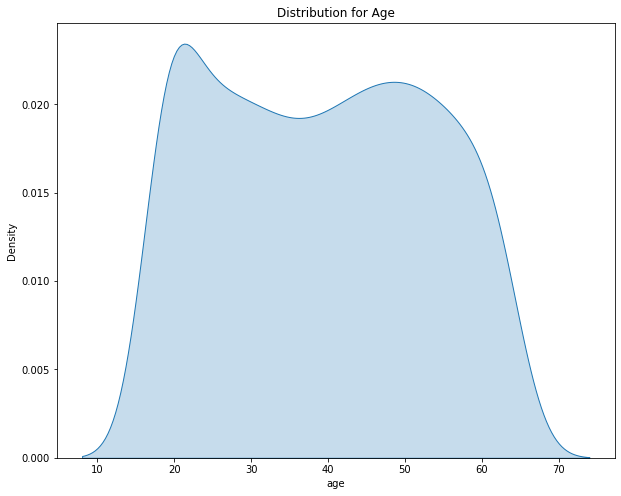

In [17]:
plt.figure(figsize=(10,8))
sns.kdeplot(data['age'], shade=True)
plt.title('Distribution for Age')
plt.show()

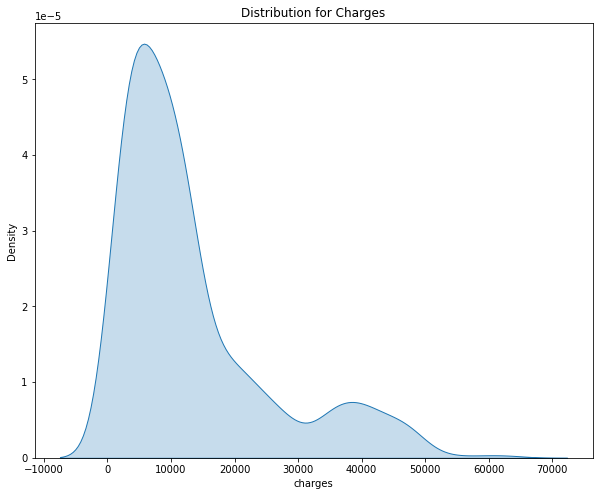

In [18]:
plt.figure(figsize=(10,8))
sns.kdeplot(data['charges'], shade=True)
plt.title('Distribution for Charges')
plt.show()

OBSERVATIONS

* the charges features is right skewed whereas the other features age and BMI are a slighty right skewed. 

In [14]:
data.select_dtypes(exclude='object').skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

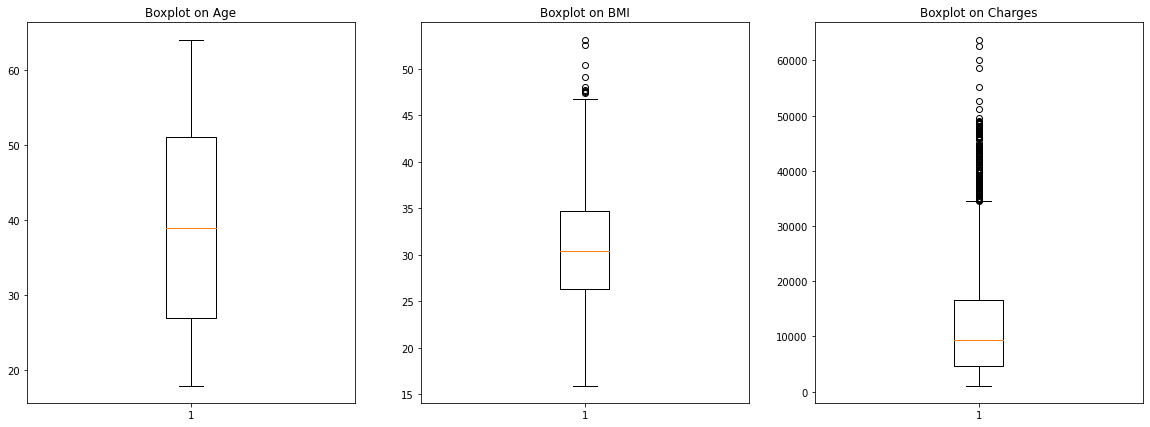

In [31]:
plt.figure(figsize=(20,7))
plt.subplot(131)
plt.title('Boxplot on Age')
plt.boxplot(x = 'age', data = data)

plt.subplot(132)
plt.title('Boxplot on BMI')
plt.boxplot(x = 'bmi', data = data)

plt.subplot(133)
plt.title('Boxplot on Charges')
plt.boxplot(x = 'charges', data = data)
plt.show()

OBSERVATIONS

* There are no outliers in Age column
* There are a few outliers in BMI column
* There are a lot of outliers in Charges column

In [32]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

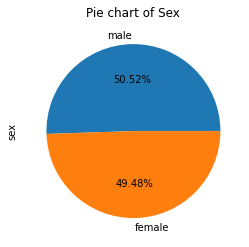

{'male': 676, 'female': 662}

In [56]:
data['sex'].value_counts().plot.pie(autopct = '%.2f%%')
plt.title('Pie chart of Sex')
plt.show()


dict(zip(data['sex'].value_counts().index.tolist() , data['sex'].value_counts().values.tolist()))

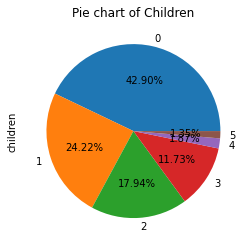

{0: 574, 1: 324, 2: 240, 3: 157, 4: 25, 5: 18}

In [57]:
data['children'].value_counts().plot.pie(autopct = '%.2f%%')
plt.title('Pie chart of Children')
plt.show()


dict(zip(data['children'].value_counts().index.tolist() , data['children'].value_counts().values.tolist()))

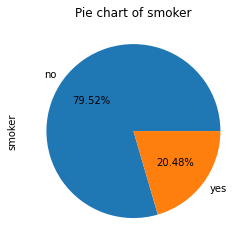

{'no': 1064, 'yes': 274}

In [58]:
data['smoker'].value_counts().plot.pie(autopct = '%.2f%%')
plt.title('Pie chart of smoker')
plt.show()


dict(zip(data['smoker'].value_counts().index.tolist() , data['smoker'].value_counts().values.tolist()))

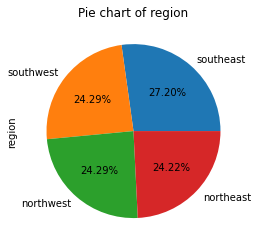

{'southeast': 364, 'southwest': 325, 'northwest': 325, 'northeast': 324}

In [59]:
data['region'].value_counts().plot.pie(autopct = '%.2f%%')
plt.title('Pie chart of region')
plt.show()


dict(zip(data['region'].value_counts().index.tolist() , data['region'].value_counts().values.tolist()))

In [61]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [64]:
# CONVERTING CATEGORICAL FEATURES 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

backup = data.copy()

In [67]:
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])

In [68]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


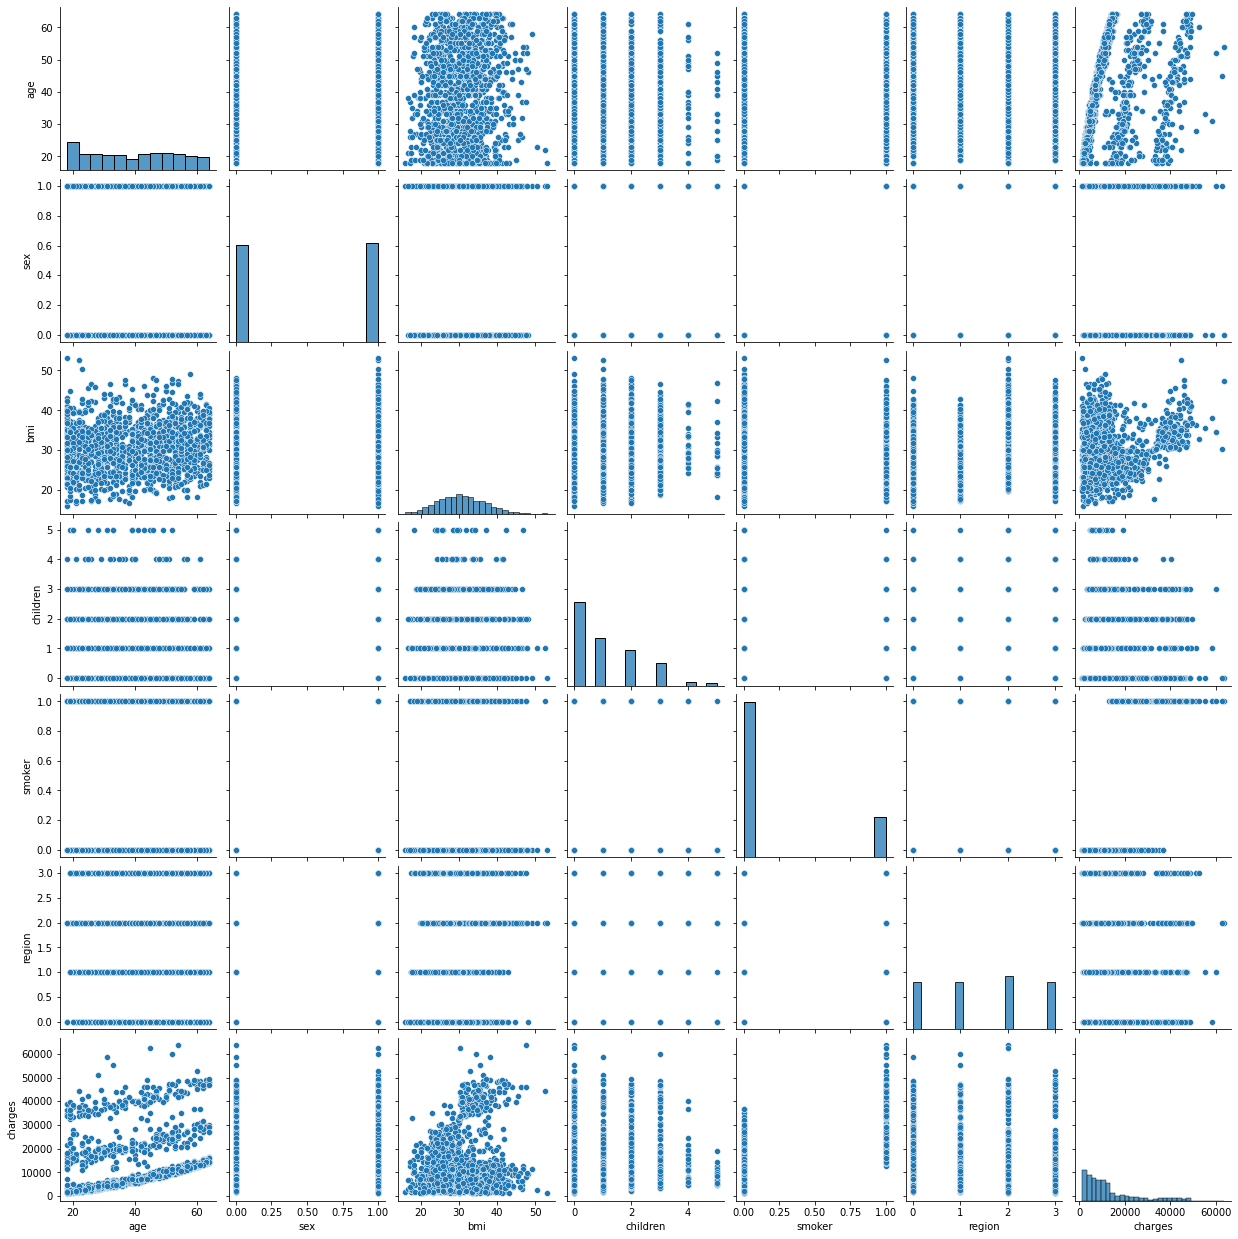

In [69]:
sns.pairplot(data)

Do charges of people who smoke differ significantly from the people who don't?

<AxesSubplot:>

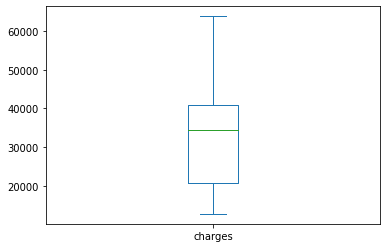

In [74]:
data[data['smoker'] == 1]['charges'].plot.box()

<AxesSubplot:>

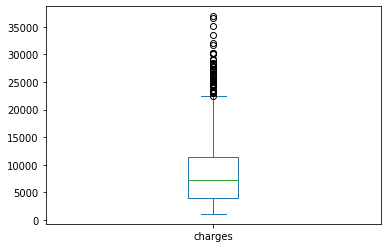

In [80]:
data[data['smoker'] == 0]['charges'].plot.box()

In [76]:
data[data['smoker'] == 1]['charges'].describe()

count      274.000000
mean     32050.231832
std      11541.547176
min      12829.455100
25%      20826.244213
50%      34456.348450
75%      41019.207275
max      63770.428010
Name: charges, dtype: float64

In [77]:
data[data['smoker'] == 0]['charges'].describe()

count     1064.000000
mean      8434.268298
std       5993.781819
min       1121.873900
25%       3986.438700
50%       7345.405300
75%      11362.887050
max      36910.608030
Name: charges, dtype: float64

OBSERVATION

* As per the abpve graph, we could see there is a great difference in charges of the people who smoke and doesnt smoke
    * smokers - min : 12829 and max : 63770
    * non smokers - min : 1121 and max : 36910

Does bmi of males differ significantly from that of females?

In [86]:
# 0 : female and 1 : male

data[data['sex'] == 0 ]['bmi'].describe()

count    662.000000
mean      30.377749
std        6.046023
min       16.815000
25%       26.125000
50%       30.107500
75%       34.313750
max       48.070000
Name: bmi, dtype: float64

In [87]:
data[data['sex'] == 1 ]['bmi'].describe()

count    676.000000
mean      30.943129
std        6.140435
min       15.960000
25%       26.410000
50%       30.687500
75%       34.992500
max       53.130000
Name: bmi, dtype: float64

OBSERVATION

* BMI for both genders are similar

Is the proportion of smokers significantly different in different genders?

In [98]:
# FEMALE

print('Female Non Smokers',(data[data['sex'] == 0 ]['smoker'].value_counts()[0]) / len(data[data['sex'] == 0 ]['smoker']))
print('Female Smokers',(data[data['sex'] == 0 ]['smoker'].value_counts()[1]) / len(data[data['sex'] == 0 ]['smoker']))


Female Non Smokers 0.8262839879154078
Female Smokers 0.17371601208459214


In [101]:
# MALE

print('Male Non Smokers',(data[data['sex'] == 1 ]['smoker'].value_counts()[0]) / len(data[data['sex'] == 1 ]['smoker']))
print('Male Smokers',(data[data['sex'] == 1 ]['smoker'].value_counts()[1]) / len(data[data['sex'] == 1 ]['smoker']))


Male Non Smokers 0.764792899408284
Male Smokers 0.23520710059171598


OBSERVATION

* there is a difference with the proportion of the smokers and non smokers of both the genders 

Is the distribution of bmi across women with no children, one child and two children, the same

<AxesSubplot:xlabel='bmi', ylabel='Density'>

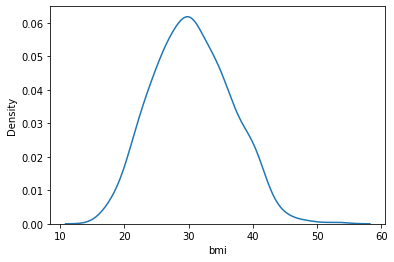

In [109]:
sns.kdeplot(data[data['children'] == 0]['bmi'])

<AxesSubplot:xlabel='bmi', ylabel='Density'>

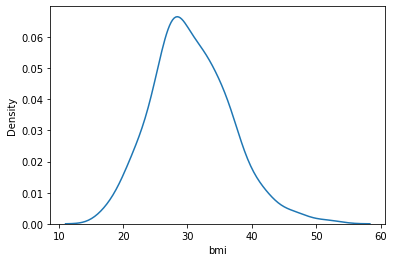

In [110]:
sns.kdeplot(data[data['children'] == 1]['bmi'])

<AxesSubplot:xlabel='bmi', ylabel='Density'>

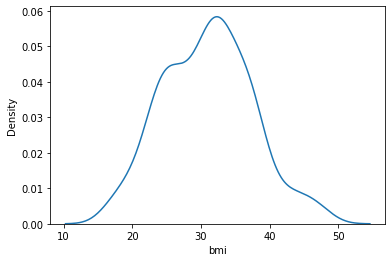

In [111]:
sns.kdeplot(data[data['children'] == 2]['bmi'])

In [112]:
data[data['children'] == 0]['bmi'].describe()

count    574.000000
mean      30.550296
std        6.039106
min       15.960000
25%       26.143750
50%       30.302500
75%       34.746250
max       53.130000
Name: bmi, dtype: float64

In [113]:
data[data['children'] == 1]['bmi'].describe()

count    324.000000
mean      30.623148
std        6.101435
min       16.815000
25%       26.615000
50%       30.015000
75%       34.237500
max       52.580000
Name: bmi, dtype: float64

In [114]:
data[data['children'] == 2]['bmi'].describe()

count    240.000000
mean      30.978104
std        6.509644
min       16.815000
25%       25.786250
50%       31.640000
75%       35.357500
max       48.070000
Name: bmi, dtype: float64

OBSERVATION

* there is no difference on bmi with respect to the number of children